<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat4/A6_WritingGIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import read_file, datasets, GeoDataFrame

In [2]:
nama='lsm.zip'
camat=gpd.read_file(nama)
camat.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


<Axes: >

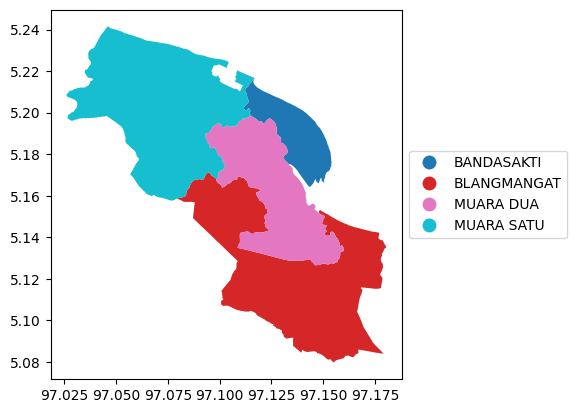

In [5]:
camat.plot(column='NAMOBJ', legend=True,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [6]:
import pandas as pd
gizi=pd.read_excel('gizi.xlsx')
gizi.head()

,NAMOBJ,gizi
0,BANDASAKTI,200
1,BLANGMANGAT,100
2,MUARA DUA,320
3,MUARA SATU,231


In [8]:
camat1=camat.merge(gizi, on='NAMOBJ')
camat1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,gizi
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...",200
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...",100
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...",320
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...",231


<Axes: >

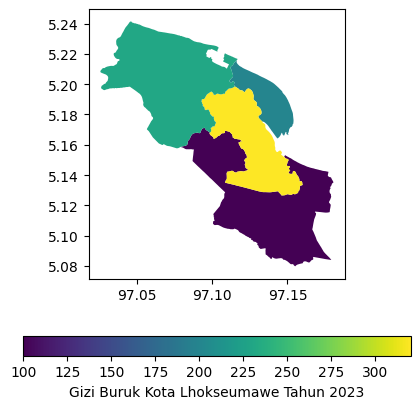

In [16]:
camat1.plot(column='gizi', legend=True,figsize=(5,5),
            legend_kwds={"label": "Gizi Buruk Kota Lhokseumawe Tahun 2023", "orientation": "horizontal"})

**Merubah data menjadi data spacial**

In [19]:
#-- Merubah data gizi menjadi dictionary --
gizi1=gizi.to_dict()

In [20]:
gizi1

{'NAMOBJ': {0: 'BANDASAKTI',
  1: 'BLANGMANGAT',
  2: 'MUARA DUA',
  3: 'MUARA SATU'},
 'gizi': {0: 200, 1: 100, 2: 320, 3: 231}}

In [23]:
for i in gizi1['gizi'].values():
  print(i)

200
100
320
231


In [29]:
status=[]
for i in gizi1['gizi'].values():
  if i>100 and i<180:
    status.append('Buruk')
  elif i>180 and i<240:
    status.append('Baik')
  elif i>240 and i<310:
    status.append('Baik Sekali')
  elif i>=320:
    status.append('Gemuk')
  else:
    status.append('Busung Lapar')


In [30]:
status

['Baik', 'Busung Lapar', 'Gemuk', 'Baik']

**Konversikan data Gizi1 ke GeoDataFrame**

In [32]:
Ggizi=gpd.GeoDataFrame(gizi1)


In [33]:
Ggizi

,NAMOBJ,gizi
0,BANDASAKTI,200
1,BLANGMANGAT,100
2,MUARA DUA,320
3,MUARA SATU,231


In [34]:
Ggizi['status']=status

In [36]:
Ggizi

,NAMOBJ,gizi,status
0,BANDASAKTI,200,Baik
1,BLANGMANGAT,100,Busung Lapar
2,MUARA DUA,320,Gemuk
3,MUARA SATU,231,Baik


In [37]:
camat2=camat.merge(Ggizi,on='NAMOBJ')

<Axes: >

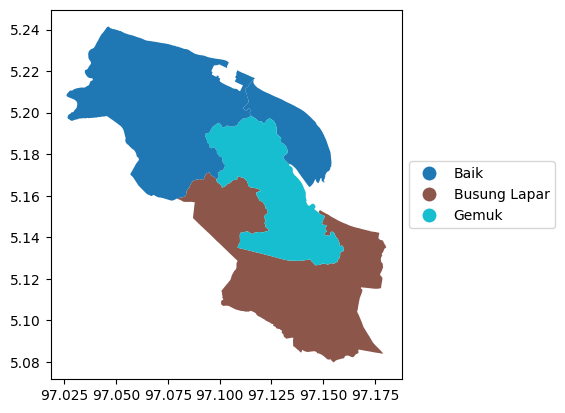

In [40]:
camat2.plot(column='status', legend=True,
            legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [41]:
camat2.to_file('status.shp')